##                                                                MECE TABLE

<table style="width:100%">
  <tr>
    <th>Name</th>
    <th>Contribution</th>
  </tr>
  <tr>
    <td>Rithwik Prem</td>
    <td>Q1 Work on Count Vector</td>
  </tr>
  <tr>
    <td>Bhupinder Singh</td>
    <td>Q3 Naive Bayes Using One Hot Vector</td>
  </tr>
  <tr>
    <td>Pulkit Batra</td>
    <td>Q1 SVM on Count Vector, ROC Curve</td>
  </tr>
  <tr>
    <td>Aman Belwal</td>
    <td>Q2 SVM on TF-IDF and ROC Curve</td>
  </tr>
  <tr>
    <td>Vishal Dadabhai Girase</td>
    <td>Q5 GloVe Embedding</td>
  </tr>
  <tr>
    <td>Sweath Palani</td>
    <td>Q4 Work on Word2Vec</td>
  </tr>
  <tr>
    <td>Dharmilkumar Nileshkumar Patel</td>
    <td>Q4 SVM on Word2Vec and ROC Curve</td>
  </tr>
  <tr>
    <td>Kevinsinh Manojsinh Raj</td>
    <td>Q5 SVM on GloVe Embedding and ROC Curve</td>
  </tr>
  <tr>
    <td>Shekhar Kaviraj Tiruwa</td>
    <td>Data Preprocessing and Q2 TF-IDF with Unigram and Bigram </td>
  </tr>
</table>

## Importing Basic Lib

In [47]:
!pip install emoji

In [48]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import emoji
import nltk
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

In [49]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Data loading and Exploring**

In [50]:
df = pd.read_csv('/content/Sentiment_Data.csv', encoding='latin-1')  # Used latin in order to encode the data

In [51]:
df.info() # Detail summary of the data
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451331 entries, 0 to 451330
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      99998 non-null  object
 1   Sentiment  99999 non-null  object
dtypes: object(2)
memory usage: 6.9+ MB


Tweet Sentiment
451326   NaN       NaN
451327   NaN       NaN
451328   NaN       NaN
451329   NaN       NaN
451330   NaN       NaN

In [52]:
df['Sentiment'].value_counts()

Sentiment
Strong_Pos    51223
Neutral       15440
Mild_Pos      14836
Strong_Neg    10413
Mild_Neg       8087
Name: count, dtype: int64

**Classes as Positive, Negative, and Neutral**

In [53]:
# Simplify sentiment categories into Positive, Negative, and Neutral
def Sentiments(Sentiment):
    if Sentiment in ['Mild_Pos', 'Strong_Pos']:
        return 'Positive'
    elif Sentiment in ['Mild_Neg', 'Strong_Neg']:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the mapping to the sentiment column
df['Sentiment'] = df['Sentiment'].apply(Sentiments)

# Check the new sentiment distribution
display(df.groupby("Sentiment").count())

Tweet
Sentiment       
Negative   18500
Neutral    15439
Positive   66059

In [54]:
# Check for non-string entries in the 'Tweet' column
non_string_tweets = df[~df['Tweet'].apply(lambda x: isinstance(x, str))]

print("Number of non-string entries in 'Tweet' column:", len(non_string_tweets))
print("\
Sample of non-string entries:")
print(non_string_tweets.head())

# Check data types of all columns
print("\
Data types of all columns:")
print(df.dtypes)

# Check for null values
print("\
Null values in each column:")
print(df.isnull().sum())

Number of non-string entries in 'Tweet' column: 351333
Sample of non-string entries:
       Tweet Sentiment
75986    NaN   Neutral
99999    NaN   Neutral
100000   NaN   Neutral
100001   NaN   Neutral
100002   NaN   Neutral
Data types of all columns:
Tweet        object
Sentiment    object
dtype: object
Null values in each column:
Tweet        351333
Sentiment         0
dtype: int64


In [55]:
# Remove the row with null value in the 'Tweet' column
df = df.dropna(subset=['Tweet'])

# Verify that the null value has been removed
print("Null values in each column after removal:")
print(df.isnull().sum())


Null values in each column after removal:
Tweet        0
Sentiment    0
dtype: int64


In [56]:
df['Tweet'].count()

99998

By looking at the tweet data we can see that there is a need for cleaning before using the data for models

## Preprocessing

**The following Python code presents a detailed description of the functionality of the clean_text function, which is described as cleansing text data by deleting URLs, Twitter @names, hashtags, numbers, special characters e.g., ‘’”,‘_’,’?’, ‘–’, ‘—’, ‘!’ or ‘=’, as well as white spaces which are more than one. This clean text is applied specifically to the ‘Tweet’ column of a dataframe and as a result a new column is created, called ‘cleaned_tweet’. A procedure like this is performed frequently before conducting text analysis such as determining the sentiment or topics in a corpus.**

In [57]:
def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove Twitter handles
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    return text
df['cleaned_tweet'] = df['Tweet'].apply(clean_text)

In [58]:
df.head()

Tweet Sentiment  \
0  @_angelica_toy Happy Anniversary!!!....The Day...  Positive   
1  @McfarlaneGlenda Happy Anniversary!!!....The D...  Positive   
2  @thevivafrei @JustinTrudeau Happy Anniversary!...  Positive   
3  @NChartierET Happy Anniversary!!!....The Day t...  Positive   
4  @tabithapeters05 Happy Anniversary!!!....The D...  Positive   

                                       cleaned_tweet  
0   Happy AnniversaryThe Day the FreeDUMB Died In...  
1   Happy AnniversaryThe Day the FreeDUMB Died In...  
2   Happy AnniversaryThe Day the FreeDUMB Died In...  
3   Happy AnniversaryThe Day the FreeDUMB Died In...  
4   Happy AnniversaryThe Day the FreeDUMB Died In...

### Feature Engineering

#### 2.Tokenization

**The Python code provided tokenizes the cleaned tweets. It delves into the sensitivities of the tokenization process in utilizing an object from the TweetTokenizer package and running the ‘cleaned_tweet’ column of the DataFrame. One would be able to see how the tokenized tweets look by viewing a new column named ‘tweet_tokens’. This column might be helpful for other text-related tasks such as professional text language generation for training a specific ML model.**

In [59]:
from nltk.tokenize import TweetTokenizer

# Initialize the TweetTokenizer
tokenizer = TweetTokenizer(preserve_case=False,
                           strip_handles=True,
                           reduce_len=True)

# Apply the tokenizer using .apply() to each row in the 'cleaned_tweet' column
df['tweet_tokens'] = df['cleaned_tweet'].apply(lambda x: tokenizer.tokenize(x))

In [60]:
df.head()

Tweet Sentiment  \
0  @_angelica_toy Happy Anniversary!!!....The Day...  Positive   
1  @McfarlaneGlenda Happy Anniversary!!!....The D...  Positive   
2  @thevivafrei @JustinTrudeau Happy Anniversary!...  Positive   
3  @NChartierET Happy Anniversary!!!....The Day t...  Positive   
4  @tabithapeters05 Happy Anniversary!!!....The D...  Positive   

                                       cleaned_tweet  \
0   Happy AnniversaryThe Day the FreeDUMB Died In...   
1   Happy AnniversaryThe Day the FreeDUMB Died In...   
2   Happy AnniversaryThe Day the FreeDUMB Died In...   
3   Happy AnniversaryThe Day the FreeDUMB Died In...   
4   Happy AnniversaryThe Day the FreeDUMB Died In...   

                                        tweet_tokens  
0  [happy, anniversarythe, day, the, freedumb, di...  
1  [happy, anniversarythe, day, the, freedumb, di...  
2  [happy, anniversarythe, day, the, freedumb, di...  
3  [happy, anniversarythe, day, the, freedumb, di...  
4  [happy, anniversarythe, day, the, freedumb, di...

#### 3.Slang Handling
Replacing slang with full words to capture correct spell  sentiment.

**The original code given below consists of two parts. In the first part, there is a mapping of words or expressions and their simulation. The second part has the same structure but is a function called replaceSlang, which is designed to replace slang words in the token with their substitutions. The ‘replaceSlang’ method is invoked, and it is executed on the specified location of the DataFrame. Consequently, the slang terms are replaced, and ‘tweet_tokens’ is appropriately substituted. Lastly, the improved data is portrayed.**

In [61]:
# Define a slang dictionary
slang_dict = {
    "u": "you",
    "ur": "your",
    "brb": "be right back",
    "idk": "I don't know",
    "lol": "laughing out loud",
    # Add more slang terms as needed...
}

# Function to replace slang in tokenized tweets, allowing for multi-word replacements
def replace_slang(tokens):
    new_tokens = []
    for token in tokens:
        if token in slang_dict.keys():
            # Replace slang, convert to lowercase, remove commas, split into individual words
            replacement = slang_dict[token].lower().replace(',', '').split(' ')
            # Extend the token list with the new replacement (could be multiple words)
            new_tokens.extend(replacement)
        else:
            # If no slang replacement is needed, add the original token
            new_tokens.append(token)
    return new_tokens

# Apply slang replacement to the tokenized tweets
df['tweet_tokens'] = df['tweet_tokens'].apply(replace_slang)

# Display the updated DataFrame
df.head()

Tweet Sentiment  \
0  @_angelica_toy Happy Anniversary!!!....The Day...  Positive   
1  @McfarlaneGlenda Happy Anniversary!!!....The D...  Positive   
2  @thevivafrei @JustinTrudeau Happy Anniversary!...  Positive   
3  @NChartierET Happy Anniversary!!!....The Day t...  Positive   
4  @tabithapeters05 Happy Anniversary!!!....The D...  Positive   

                                       cleaned_tweet  \
0   Happy AnniversaryThe Day the FreeDUMB Died In...   
1   Happy AnniversaryThe Day the FreeDUMB Died In...   
2   Happy AnniversaryThe Day the FreeDUMB Died In...   
3   Happy AnniversaryThe Day the FreeDUMB Died In...   
4   Happy AnniversaryThe Day the FreeDUMB Died In...   

                                        tweet_tokens  
0  [happy, anniversarythe, day, the, freedumb, di...  
1  [happy, anniversarythe, day, the, freedumb, di...  
2  [happy, anniversarythe, day, the, freedumb, di...  
3  [happy, anniversarythe, day, the, freedumb, di...  
4  [happy, anniversarythe, day, the, freedumb, di...

#### 4.Emoji Handling
Convert emojis to text equivalents

**This below python code written in Python runs an `emoji` at line 1 and checks the emojis present in a sentence. This ‘tweet_tokens’ mentioned within the context of the problem is displayed as such emojis can appear anywhere. In this case, a simple ‘No emoji found’ message is displayed.**

In [62]:
import emoji

# Check if any token in 'tweet_tokens' contains an emoji
has_emoji = df['tweet_tokens'].apply(lambda tokens: any(emoji.is_emoji(token) for token in tokens)).any()

# Print result
print("Contains emoji:" if has_emoji else "No emoji found")

No emoji found


#### Stopword Removal and Punctuation Handling
**Stopwords are common words (like “the,” “and”) that usually don’t carry much meaning in sentiment analysis. Removing them reduces noise.**

In [63]:
from nltk.corpus import stopwords

# Load stopwords
stop_words = set(stopwords.words('english'))

# Apply stopword removal to the tokenized list without affecting the tokenization
df['tweet_tokens'] = df['tweet_tokens'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [64]:
!pip install symspellpy

In [65]:
df.head()

Tweet Sentiment  \
0  @_angelica_toy Happy Anniversary!!!....The Day...  Positive   
1  @McfarlaneGlenda Happy Anniversary!!!....The D...  Positive   
2  @thevivafrei @JustinTrudeau Happy Anniversary!...  Positive   
3  @NChartierET Happy Anniversary!!!....The Day t...  Positive   
4  @tabithapeters05 Happy Anniversary!!!....The D...  Positive   

                                       cleaned_tweet  \
0   Happy AnniversaryThe Day the FreeDUMB Died In...   
1   Happy AnniversaryThe Day the FreeDUMB Died In...   
2   Happy AnniversaryThe Day the FreeDUMB Died In...   
3   Happy AnniversaryThe Day the FreeDUMB Died In...   
4   Happy AnniversaryThe Day the FreeDUMB Died In...   

                                        tweet_tokens  
0  [happy, anniversarythe, day, freedumb, died, t...  
1  [happy, anniversarythe, day, freedumb, died, t...  
2  [happy, anniversarythe, day, freedumb, died, t...  
3  [happy, anniversarythe, day, freedumb, died, t...  
4  [happy, anniversarythe, day, freedumb, died, t...

In [66]:
## Spell Correction
from symspellpy import SymSpell, Verbosity

# Initialize SymSpell and load a dictionary
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
dictionary_path = "frequency_dictionary_en_82_765.txt"  # Ensure you have the dictionary file
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

# Function to correct spelling in tokenized tweets using SymSpell
def correct_spelling_symspell(tokens):
    corrected_tokens = []
    for token in tokens:
        suggestions = sym_spell.lookup(token, Verbosity.CLOSEST, max_edit_distance=2)
        if suggestions:
            corrected_tokens.append(suggestions[0].term)  # Take the first suggestion
        else:
            corrected_tokens.append(token)  # Keep the token as-is if no suggestion
    return corrected_tokens

# Apply the spell correction function to the tokenized tweets
df['tweet_tokens'] = df['tweet_tokens'].apply(correct_spelling_symspell)



2024-09-27 02:08:45,499: E symspellpy.symspellpy] Dictionary file not found at frequency_dictionary_en_82_765.txt.
ERROR:symspellpy.symspellpy:Dictionary file not found at frequency_dictionary_en_82_765.txt.


In [67]:
# Display the updated DataFrame
df.tail()

Tweet Sentiment  \
99994  While we're on it, the so-called #FreedomConvo...  Negative   
99995  #Canada \n#inflation \n#recession \n#CostOfLiv...   Neutral   
99996  @PunkRockWino I don't recall the freedom convo...  Negative   
99997  @globeandmail Right. Just like Trudeau failed ...  Positive   
99998  Police Fire Tear Gas at âFreedom Convoyâ P...  Negative   

                                           cleaned_tweet  \
99994  While were on it the socalled did all of these...   
99995                                                      
99996   I dont recall the freedom convoy employing bl...   
99997   Right Just like Trudeau failed to show up whe...   
99998  Police Fire Tear Gas at âFreedom Convoyâ Prote...   

                                            tweet_tokens  
99994  [socalled, except, coup, cheered, terrorist, j...  
99995                                                 []  
99996  [dont, recall, freedom, convoy, employing, bla...  
99997  [right, like, trudeau, failed, show, freedom, ...  
99998  [police, fire, tear, gas, âfreedom, convoyâ, p...

### Stemming OR Lematization
Lemmatization: Converts words to their base form (e.g., “running” → “run”).

**The Python code shared below shows how to do lemmatization on a collection of tokenised tweets. In this case, WordNetLemmatizer object is created and applied to a DataFrame tweet_tokens. When computational changes on any tweet_tokens, they are returned as lemmatized tokens in the ‘tweet_tokens2’ column. These lemmatized tokens are further applied in analysis of other text-related tasks.**

In [68]:
import nltk
from nltk.stem import WordNetLemmatizer

# Ensure you have the required data downloaded
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply lemmatization to the tokenized tweets
df['tweet_tokens'] = df['tweet_tokens'].apply(lemmatize_tokens)

# Rebuild the cleaned tweet from tokens (if needed)
df['lematized_text'] = df['tweet_tokens'].apply(lambda x: ' '.join(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [69]:
df.head()

Tweet Sentiment  \
0  @_angelica_toy Happy Anniversary!!!....The Day...  Positive   
1  @McfarlaneGlenda Happy Anniversary!!!....The D...  Positive   
2  @thevivafrei @JustinTrudeau Happy Anniversary!...  Positive   
3  @NChartierET Happy Anniversary!!!....The Day t...  Positive   
4  @tabithapeters05 Happy Anniversary!!!....The D...  Positive   

                                       cleaned_tweet  \
0   Happy AnniversaryThe Day the FreeDUMB Died In...   
1   Happy AnniversaryThe Day the FreeDUMB Died In...   
2   Happy AnniversaryThe Day the FreeDUMB Died In...   
3   Happy AnniversaryThe Day the FreeDUMB Died In...   
4   Happy AnniversaryThe Day the FreeDUMB Died In...   

                                        tweet_tokens  \
0  [happy, anniversarythe, day, freedumb, died, t...   
1  [happy, anniversarythe, day, freedumb, died, t...   
2  [happy, anniversarythe, day, freedumb, died, t...   
3  [happy, anniversarythe, day, freedumb, died, t...   
4  [happy, anniversarythe, day, freedumb, died, t...   

                                      lematized_text  
0  happy anniversarythe day freedumb died tune mc...  
1  happy anniversarythe day freedumb died tune mc...  
2  happy anniversarythe day freedumb died tune mc...  
3  happy anniversarythe day freedumb died tune mc...  
4  happy anniversarythe day freedumb died tune mc...

### Model Building

1. SVM model using Count-Vectors with Unigram

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # Using LinearSVC for faster training
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets (if the dataset is large, sample a fraction)
df_sampled = df.sample(frac=0.5, random_state=42)  # Use 50% of the dataset for faster training

# Split the sampled data
X_train, X_test, y_train, y_test = train_test_split(df_sampled['lematized_text'], df_sampled['Sentiment'], test_size=0.2, random_state=42)

# Create Count Vectorizer with faster parameters
count_vectorizer = CountVectorizer(ngram_range=(1, 1),  # Use unigrams only for faster processing
                                   max_features=3000,   # Reduce to top 3000 features
                                   stop_words='english',  # Remove English stopwords
                                   min_df=2,  # Ignore words with doc freq < 2
                                   max_df=0.95)  # Ignore words with doc freq > 95%

# Fit the vectorizer to the training data
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# Print information about the features
print("Shape of feature matrix:", X_train_counts.shape)
print("Number of features:", len(count_vectorizer.get_feature_names_out()))
print("Sample features:", count_vectorizer.get_feature_names_out()[:10])

# Train the LinearSVC classifier for faster training
svm = LinearSVC(max_iter=1000)  # Limit the number of iterations to 1000
svm.fit(X_train_counts, y_train)

# Predict and evaluate
y_pred_count = svm.predict(X_test_counts)

# Print classification report and accuracy
print("Classification Report (LinearSVC with CountVectorizer):")
print(classification_report(y_test, y_pred_count))
print("Accuracy:", accuracy_score(y_test, y_pred_count))

# Display distribution of sentiment classes
print("Distribution of sentiment classes:")
print(df_sampled['Sentiment'].value_counts(normalize=True))

Shape of feature matrix: (39999, 3000)
Number of features: 3000
Sample features: ['ab' 'abandoned' 'abiding' 'ability' 'able' 'absolute' 'absolutely'
 'absurd' 'abuse' 'abused']
Classification Report (LinearSVC with CountVectorizer):
              precision    recall  f1-score   support

    Negative       0.68      0.61      0.65      1930
     Neutral       0.62      0.48      0.54      1518
    Positive       0.86      0.93      0.89      6552

    accuracy                           0.80     10000
   macro avg       0.72      0.67      0.69     10000
weighted avg       0.79      0.80      0.79     10000

Accuracy: 0.7989
Distribution of sentiment classes:
Sentiment
Positive    0.660573
Negative    0.186544
Neutral     0.152883
Name: proportion, dtype: float64


**The figure attached to this document displays an ROC curve with three classes. Each class is represented by a distinct colored curve, with its AUC value displayed. Neutral has the most promising performance potential among the classes with its AUC value of 0.76. In terms of ability to differentiate between the two categories, one in particular is more likely than others. Results indicate that prediction of positive or negative observations from positive instances and negative instances is better as combined under class Neutral. This class has the largest AUC of all three classes so I goodness expect that it is better in the discrimination between positive and negative cases compared to the other classes. Positive and negative, on the other extreme, have poorer values of 0.14 and 0.13 for their AUC, implying there is scope for improvement. It can also be noticed that as the values approach 0, the performance tends to become inferior. On the opposite, a random classifier, is represented in the graph by a dotted line, a nation where raised values compared to anticipated are taken into consideration. In particular, that the curve is located above the dotted line highlights that the target model is of practical utility.**

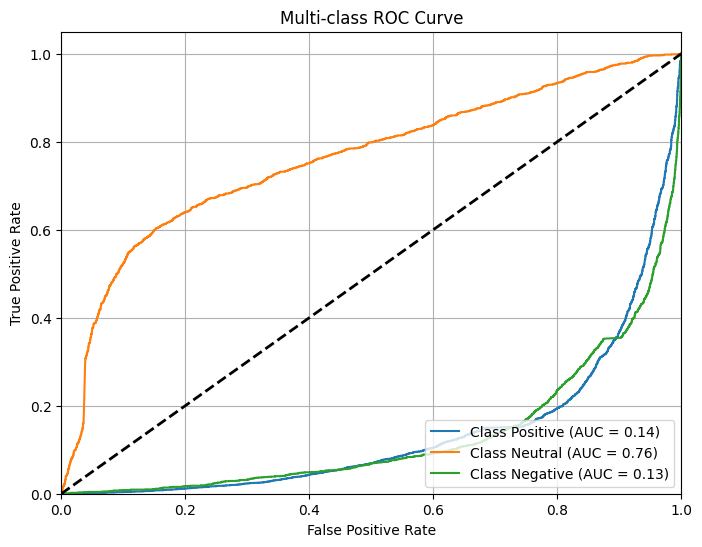

In [71]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Binarize the output for multi-class ROC
y_train_binarized = label_binarize(y_train, classes=df_sampled['Sentiment'].unique())
y_test_binarized = label_binarize(y_test, classes=df_sampled['Sentiment'].unique())

# Step 2: Get the decision function scores for ROC curve
y_score = svm.decision_function(X_test_counts)  # Decision function scores

# Step 3: Compute ROC curve and AUC for each class
fpr = dict()  # False Positive Rate
tpr = dict()  # True Positive Rate
roc_auc = dict()  # ROC AUC for each class

n_classes = y_train_binarized.shape[1]  # Number of classes

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_score[:, i])

# Step 4: Plot the ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {df_sampled["Sentiment"].unique()[i]} (AUC = {roc_auc[i]:.2f})')

# Step 5: Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Dashed diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

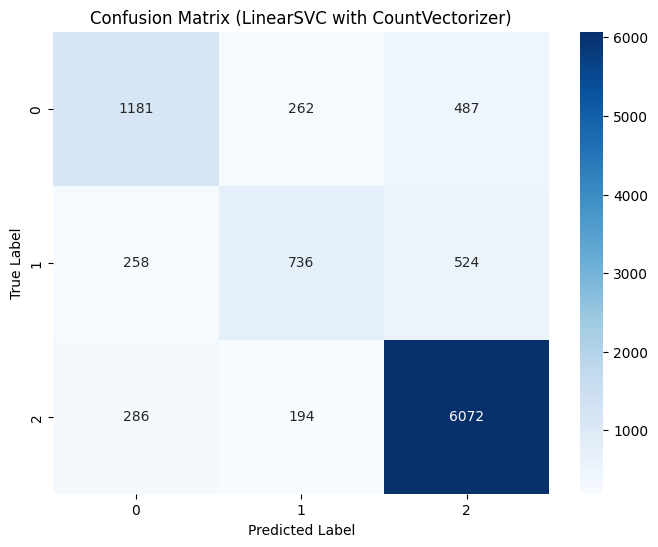

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_count)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (LinearSVC with CountVectorizer)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Define the pipeline for CountVectorizer + LinearSVC
pipeline = make_pipeline(CountVectorizer(ngram_range=(1, 1),  # Use unigrams only for faster processing
                                         max_features=3000,   # Reduce to top 3000 features
                                         stop_words='english',  # Remove English stopwords
                                         min_df=2,  # Ignore words with doc freq < 2
                                         max_df=0.95),  # Ignore words with doc freq > 95%
                          LinearSVC(max_iter=1000))  # Limit the number of iterations to 1000

# Perform cross-validation
cv_scores = cross_val_score(pipeline, df_sampled['lematized_text'], df_sampled['Sentiment'], cv=5, scoring='accuracy')

# Print cross-validation results
print("Cross-validation scores (5-fold):", cv_scores)
print("Mean accuracy:", np.mean(cv_scores))

# Train the model on the entire training data (using pipeline)
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred_count = pipeline.predict(X_test)

# Print classification report and accuracy for test set
print("Classification Report (LinearSVC with CountVectorizer):")
print(classification_report(y_test, y_pred_count))
print("Accuracy on test set:", accuracy_score(y_test, y_pred_count))

# Display distribution of sentiment classes in the sampled dataset
print("Distribution of sentiment classes:")
print(df_sampled['Sentiment'].value_counts(normalize=True))

Cross-validation scores (5-fold): [0.8022     0.8023     0.8033     0.8034     0.80408041]
Mean accuracy: 0.8030560816081607
Classification Report (LinearSVC with CountVectorizer):
              precision    recall  f1-score   support

    Negative       0.68      0.61      0.65      1930
     Neutral       0.62      0.48      0.54      1518
    Positive       0.86      0.93      0.89      6552

    accuracy                           0.80     10000
   macro avg       0.72      0.67      0.69     10000
weighted avg       0.79      0.80      0.79     10000

Accuracy on test set: 0.7989
Distribution of sentiment classes:
Sentiment
Positive    0.660573
Negative    0.186544
Neutral     0.152883
Name: proportion, dtype: float64


2. SVM model using TF-IDF with Unigram+Bigram

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.utils import resample

# Reduce the data size for testing purposes (use 50% of the original data)
df_sampled = resample(df, n_samples=int(len(df) * 0.5), random_state=42)

# Initialize TF-IDF Vectorizer for Unigram + Bigram
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english', min_df=2, max_df=0.95)

# Fit and transform the sampled cleaned data
X_tfidf = tfidf_vectorizer.fit_transform(df_sampled['lematized_text'])

# Define labels (Simplified Sentiment)
y = df_sampled['Sentiment']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Check the split
print(f"Train set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

# Initialize and train the SVM model with faster settings
svm_model = LinearSVC(dual=False, max_iter=1000)  # Limit iterations for faster convergence
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Display results
from sklearn.metrics import classification_report, accuracy_score

print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Train set size: 39999, Test set size: 10000
Classification Report:
              precision    recall  f1-score   support

    Negative       0.68      0.54      0.60      1843
     Neutral       0.71      0.42      0.53      1573
    Positive       0.82      0.94      0.88      6584

    accuracy                           0.79     10000
   macro avg       0.74      0.63      0.67     10000
weighted avg       0.77      0.79      0.77     10000

Accuracy: 0.7867


**Given is a multiclass ROC curve. Every line taken contributes to the measurements of a different class. Different performances are indicated by the AUC. Negative class has an AUC of 0.65-wisest amongst all three classes of positive and negative samples. Interestingly, Neutrals and the Positives are adjoined having given the fact that the AUC values are closer in this case, but much lower (0.17 and 0.22, correspondingly). The random classifier is represented by the dashed line, and any curve above the reference supports a predictive model.**

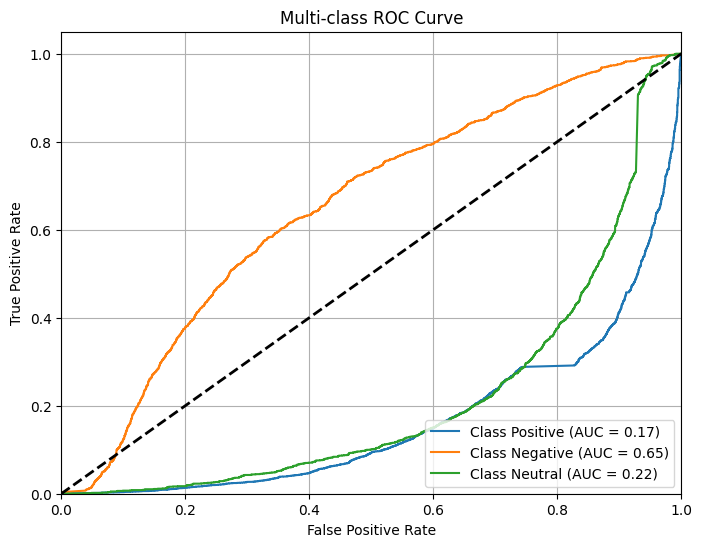

In [75]:

# Step 1: Binarize the output for multi-class ROC
y_train_binarized = label_binarize(y_train, classes=df_sampled['Sentiment'].unique())
y_test_binarized = label_binarize(y_test, classes=df_sampled['Sentiment'].unique())

# Step 2: Get the decision function scores for ROC curve
y_score = svm_model.decision_function(X_test)  # Decision function scores

# Step 3: Compute ROC curve and AUC for each class
fpr = dict()  # False Positive Rate
tpr = dict()  # True Positive Rate
roc_auc = dict()  # ROC AUC for each class

n_classes = y_train_binarized.shape[1]  # Number of classes

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_score[:, i])

# Step 4: Plot the ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {df_sampled["Sentiment"].unique()[i]} (AUC = {roc_auc[i]:.2f})')

# Step 5: Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Dashed diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

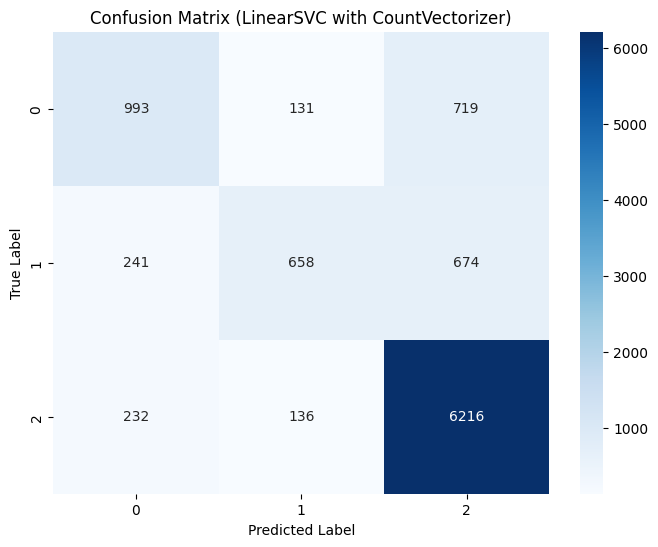

In [76]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (LinearSVC with CountVectorizer)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
import numpy as np
from sklearn.metrics import classification_report, accuracy_score

# Reduce the data size for testing purposes (use 50% of the original data)
df_sampled = resample(df, n_samples=int(len(df) * 0.5), random_state=42)

# Define features and labels
X = df_sampled['lematized_text']
y = df_sampled['Sentiment']

# Initialize the pipeline: TF-IDF Vectorizer + LinearSVC
pipeline = make_pipeline(TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english', min_df=2, max_df=0.95),
                         LinearSVC(dual=False, max_iter=1000))

# Apply 5-fold cross-validation and calculate accuracy scores
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation accuracy scores (5-fold): {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores)}")

# Now, split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Display the classification report and accuracy for the test set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")

Cross-validation accuracy scores (5-fold): [0.7842     0.7856     0.7812     0.7731     0.78167817]
Mean accuracy: 0.7811556335633563
Classification Report on Test Set:
              precision    recall  f1-score   support

    Negative       0.68      0.54      0.60      1843
     Neutral       0.70      0.41      0.52      1573
    Positive       0.82      0.94      0.88      6584

    accuracy                           0.79     10000
   macro avg       0.73      0.63      0.66     10000
weighted avg       0.77      0.79      0.77     10000

Test Set Accuracy: 0.7855


3.Naive Bayes model using One-Hot Vectors for Unigram+Bigram

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import resample
from sklearn.metrics import classification_report, accuracy_score


# Initialize Count Vectorizer for Unigram + Bigram (One-Hot Vectors)
count_vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english', min_df=2, max_df=0.95)
count_vectorizer_for = count_vectorizer
# Fit and transform the sampled cleaned data to generate One-Hot Vectors
X_counts = count_vectorizer.fit_transform(df_sampled['lematized_text'])

# Define labels (Simplified Sentiment)
y = df_sampled['Sentiment']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.2, random_state=42, stratify=y)

# Check the split
print(f"Train set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Display results
print("Classification Report (Naive Bayes with One-Hot Vectors):")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Train set size: 39999, Test set size: 10000
Classification Report (Naive Bayes with One-Hot Vectors):
              precision    recall  f1-score   support

    Negative       0.65      0.44      0.53      1843
     Neutral       0.35      0.18      0.24      1573
    Positive       0.76      0.91      0.83      6584

    accuracy                           0.71     10000
   macro avg       0.58      0.51      0.53     10000
weighted avg       0.67      0.71      0.68     10000

Accuracy: 0.7105


In [82]:
print(X_train[:3])
# Example output: [['hello', 'world'], ['machine', 'learning'], ['text', 'data']]

  (0, 336)	1
  (0, 168)	1
  (0, 24)	1
  (0, 337)	1
  (0, 968)	1
  (0, 889)	1
  (0, 111)	1
  (0, 846)	1
  (0, 667)	1
  (0, 975)	1
  (0, 110)	1
  (0, 391)	1
  (0, 43)	1
  (0, 192)	1
  (0, 702)	1
  (1, 336)	1
  (1, 168)	1
  (1, 337)	1
  (1, 321)	2
  (1, 897)	1
  (1, 160)	1
  (1, 161)	1
  (1, 334)	1
  (2, 336)	1
  (2, 168)	2
  (2, 337)	1
  (2, 624)	2
  (2, 99)	1
  (2, 758)	1
  (2, 914)	1
  (2, 34)	1
  (2, 307)	1
  (2, 660)	1
  (2, 462)	1


In [83]:
# Assuming you have already vectorized your data and X_train is in sparse matrix format

# Use the vectorizer to retrieve the feature names (i.e., the vocabulary)
feature_names = count_vectorizer.get_feature_names_out()

# Now convert the sparse matrix to tokenized sentences
def sparse_to_tokenized(csr_matrix, feature_names):
    """Convert a sparse matrix back into tokenized text based on non-zero indices."""
    tokenized_sentences = []
    for row in csr_matrix:
        # Get the indices of the non-zero elements in each document (row)
        tokens = [feature_names[i] for i in row.indices]  # Map indices to feature names (words)
        tokenized_sentences.append(tokens)  # Store tokenized sentence
    return tokenized_sentences

# Convert X_train (sparse matrix) to tokenized sentences
X_train_tokenized = sparse_to_tokenized(X_train, feature_names)
X_test_tokenized = sparse_to_tokenized(X_test, feature_names)

# Check the tokenized output
print(X_train_tokenized)  # This should now be tokenized data usable for Word2Vec
print(X_test_tokenized)

[['freedom', 'convoy', 'amp', 'freedom convoy', 'wont', 'trudeau', 'case', 'tell', 'police', 'world', 'care', 'health', 'assault', 'convoy trudeau', 'province'], ['freedom', 'convoy', 'freedom convoy', 'flag', 'trump', 'confederate', 'confederate flag', 'fox'], ['freedom', 'convoy', 'freedom convoy', 'ottawa', 'canada', 'said', 'unity', 'area', 'february', 'planned', 'james'], ['freedom', 'convoy', 'amp', 'freedom convoy', 'im', 'support', 'trudeau', 'racist', 'vaccine', 'choice', 'poilievre', 'happy', 'extremist', 'view', 'charter', 'man', 'amp freedom', 'convoy trudeau', 'unacceptable'], ['freedom', 'convoy', 'freedom convoy', 'told', 'security', 'csis', 'threat', 'government', 'security threat'], ['âfreedom', 'convoyâ', 'âfreedom convoyâ', 'lawyer', 'action', 'child'], ['freedom', 'convoy', 'freedom convoy', 'told', 'fear', 'trudeau', 'biden', 'end', 'car', 'plant', 'end freedom'], ['freedom', 'convoy', 'freedom convoy', 'like', 'trudeau', 'canada', 'look', 'actually', 'make', 'wron

**The diagram depicted in the table is anwendung of a multifunctional ROC curve that relates to Naive Bayes. It is quite normal that each line that is being catered to here reflects this or that class, and it assesses each of them with its corresponding AUC. I.e., the value of AUC for “Negative” class is maximal (0.65) signaling that this class is the best performer in this task separating the classes from their opposites. But for Positive and Neutral class it is different, their rate of areas under the curve is much less (0.18 and 0.29 respectively) showing bad results. The dash line depicts the lower (the worst) extreme, which is an indefinite model, and involves a very simple concept of just assigning random labels to instances during prediction. Consequently, the causes are ambiguous model again, something that is hard to qualify it contains some associations or patterns.**

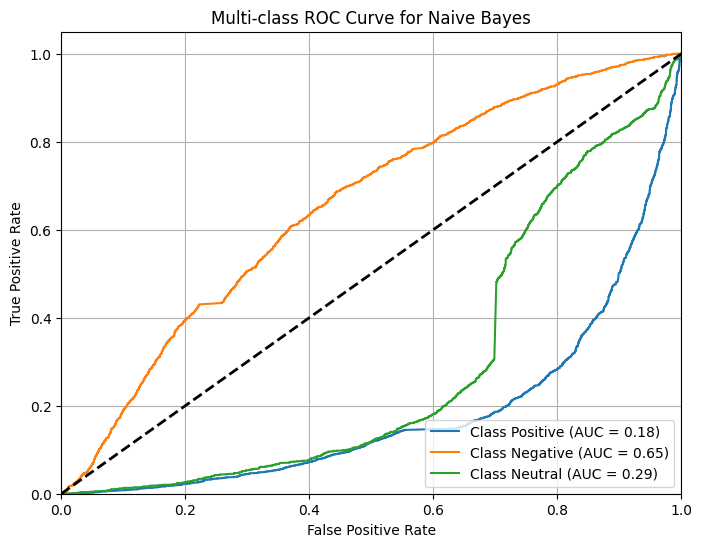

In [84]:
# Step 1: Binarize the output for multi-class ROC
y_train_binarized = label_binarize(y_train, classes=df_sampled['Sentiment'].unique())
y_test_binarized = label_binarize(y_test, classes=df_sampled['Sentiment'].unique())

# Step 2: Get the predicted probabilities for ROC curve
y_score = nb_model.predict_proba(X_test)  # Predict probabilities

# Step 3: Compute ROC curve and AUC for each class
fpr = dict()  # False Positive Rate
tpr = dict()  # True Positive Rate
roc_auc = dict()  # ROC AUC for each class

n_classes = y_train_binarized.shape[1]  # Number of classes

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_score[:, i])

# Step 4: Plot the ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {df_sampled["Sentiment"].unique()[i]} (AUC = {roc_auc[i]:.2f})')

# Step 5: Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Dashed diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

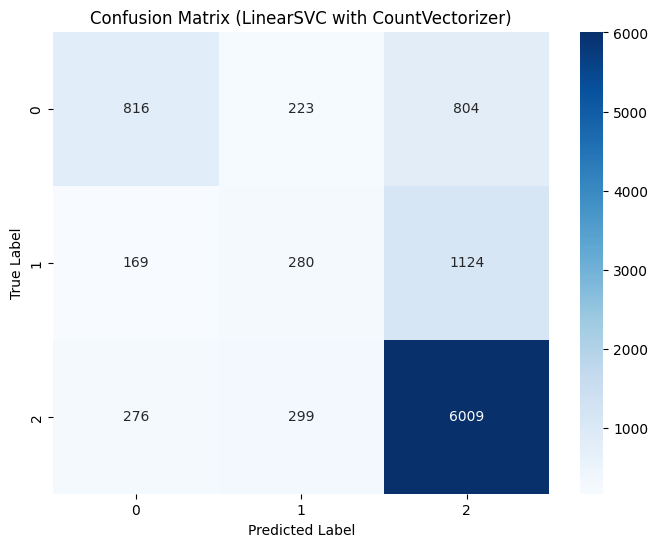

In [85]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (LinearSVC with CountVectorizer)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [86]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Reduce the data size for testing purposes (use 50% of the original data)
df_sampled = resample(df, n_samples=int(len(df) * 0.5), random_state=42)

# Define features and labels
X = df_sampled['lematized_text']
y = df_sampled['Sentiment']

# Initialize a pipeline with CountVectorizer and MultinomialNB
pipeline = make_pipeline(CountVectorizer(ngram_range=(1, 2), max_features=1000, stop_words='english', min_df=2, max_df=0.95),
                         MultinomialNB())

# Apply 5-fold cross-validation and calculate accuracy scores
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-validation accuracy scores (5-fold): {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores)}")

# Now, split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Display the classification report and accuracy for the test set
print("Classification Report (Naive Bayes with One-Hot Vectors) on Test Set:")
print(classification_report(y_test, y_pred))
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred)}")

Cross-validation accuracy scores (5-fold): [0.7039    0.7044    0.7021    0.702     0.7069707]
Mean accuracy: 0.7038741394139414
Classification Report (Naive Bayes with One-Hot Vectors) on Test Set:
              precision    recall  f1-score   support

    Negative       0.65      0.44      0.53      1843
     Neutral       0.35      0.18      0.23      1573
    Positive       0.76      0.91      0.83      6584

    accuracy                           0.71     10000
   macro avg       0.58      0.51      0.53     10000
weighted avg       0.67      0.71      0.68     10000

Test Set Accuracy: 0.71


#### 4. SVM Model using word2vec (CBOW or Skipgram and any vector size from 64 to 300)

In [87]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'X_train_tokenized' is already tokenized and available
# X_train_tokenized should be a list of tokenized sentences (i.e., list of lists of words)

# Step 2: Train Word2Vec model (CBOW model with vector size 100, and 4 parallel workers for efficiency)
w2v_model = Word2Vec(sentences=X_train_tokenized, vector_size=100, window=5, min_count=1, sg=0, workers=4)  # CBOW model

# Function to create sentence vectors by averaging word vectors
def sentence_vector(sentence, model, vector_size):
    """Averaging word vectors for each sentence."""
    # Ensure only words present in the Word2Vec vocabulary are considered
    words = [word for word in sentence if word in model.wv]

    # Return zero vector if no words in the sentence are in the Word2Vec vocabulary
    if len(words) == 0:
        return np.zeros(vector_size)

    # Return the average of word vectors in the sentence
    return np.mean(model.wv[words], axis=0)

# Step 3: Convert the entire dataset into vectors for training and testing
# 'X_train_tokenized' and 'X_test_tokenized' should be tokenized lists of sentences
X_train_vectors = np.array([sentence_vector(sentence, w2v_model, 100) for sentence in X_train_tokenized])
X_test_vectors = np.array([sentence_vector(sentence, w2v_model, 100) for sentence in X_test_tokenized])

# Step 4: Train an SVM model using the sentence vectors
svm_model = SVC(kernel='linear')  # Linear SVM classifier
svm_model.fit(X_train_vectors, y_train)

# Step 5: Evaluate the SVM model on the test set
y_pred_svm = svm_model.predict(X_test_vectors)

# Step 6: Classification report and accuracy
print("Classification Report (SVM with Word2Vec):")
print(classification_report(y_test, y_pred_svm))  # Prints precision, recall, F1-score
print("Accuracy:", accuracy_score(y_test, y_pred_svm))  # Prints accuracy of the model

Classification Report (SVM with Word2Vec):
              precision    recall  f1-score   support

    Negative       0.47      0.12      0.19      1843
     Neutral       0.88      0.19      0.31      1573
    Positive       0.70      0.98      0.82      6584

    accuracy                           0.70     10000
   macro avg       0.68      0.43      0.44     10000
weighted avg       0.69      0.70      0.62     10000

Accuracy: 0.6976


**Displayed is a multi-class ROC curve visual of the implementation of Word2Vec embeddings modelled with a LinearSvc. Each line represents a class, with AUCs suggested by their performance. Class Positive is at reached the top with an AUC of 0.78, which is indicative of the fact that it can be easily distinguished from negative cases. AUCs of Class Negative and Class Neutral are quite relatively less (0.72 vs. 0.68), However, the performances are still good, just not as excellent as the former. In the image, the dashed line in the diagram signifies a random classifier and anything beyond this curve is considered to have a semblance of modeling skills.**

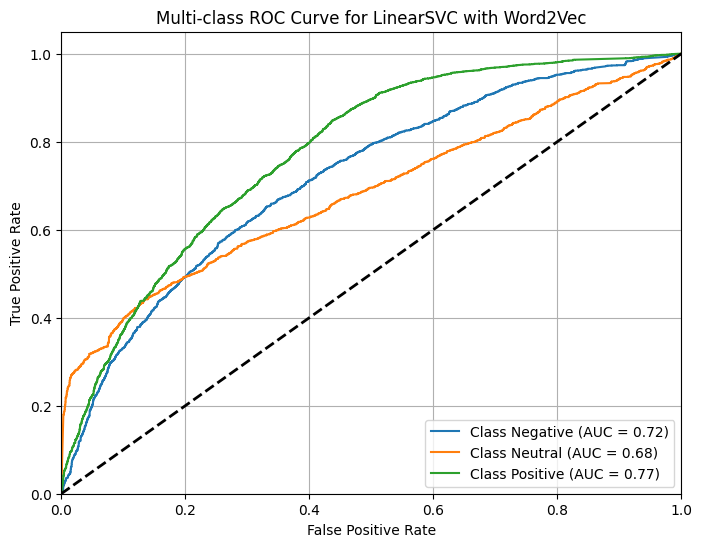

In [88]:
from sklearn.preprocessing import LabelBinarizer

# Step 7: Binarize the output for multi-class ROC
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test)

# Step 8: Get the decision function scores for ROC curve
y_score = svm_model.decision_function(X_test_vectors)  # Get decision function scores

# Since LinearSVC is a one-vs-all classifier, we need to compute the scores for each class
# Reshape the y_score for multi-class classification
y_score_multiclass = np.zeros((y_score.shape[0], len(lb.classes_)))

for i in range(len(lb.classes_)):
    y_score_multiclass[:, i] = y_score[:, i]  # Fill in the decision function for each class

# Step 9: Compute ROC curve and AUC for each class
fpr = dict()  # False Positive Rate
tpr = dict()  # True Positive Rate
roc_auc = dict()  # ROC AUC for each class

n_classes = y_test_binarized.shape[1]  # Number of classes

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_multiclass[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_score_multiclass[:, i])

# Step 10: Plot the ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Step 11: Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Dashed diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve for LinearSVC with Word2Vec')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


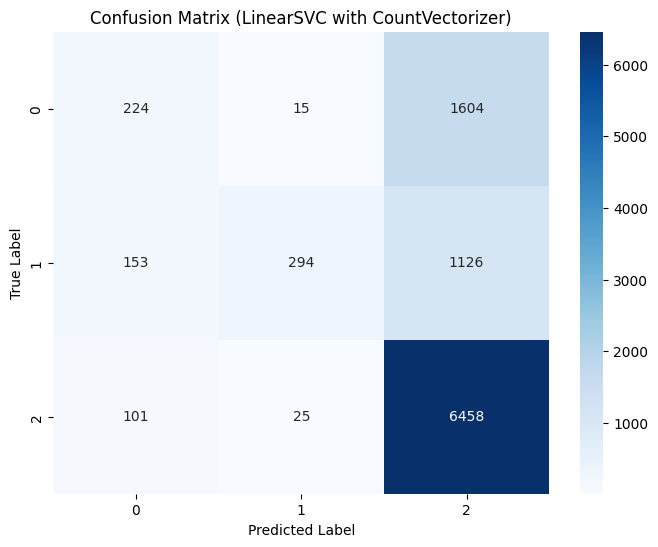

In [89]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (LinearSVC with CountVectorizer)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Q 5. SVM Model using any other word embedding (GloVe, Fasttext or ELMo)

**The graph above illustrates a ROC graph for multiple (multiclass) class problems. Each line on the graph represents a different class, and an approximate area under curve (AUC), which reveals the general and comparative performance of each class. Lines of Class 0 and Class 2 have the best AUC values (0.84 and 0.84) which indicates that attracting positive categories is better than the rest. The lowest AUC value (0.72) corresponds to Class 1, implying better, however, not as good as the other classes. The dotted curve over the real curve illustrates a guessing probability and below such a curve is of any value since it can predict some patterns.**

GloVe embeddings loaded successfully.
Text data converted to GloVe embeddings successfully.
Accuracy: 0.74775
Classification Report:
               precision    recall  f1-score   support

    Negative       0.66      0.44      0.53      3794
     Neutral       0.81      0.19      0.31      2995
    Positive       0.76      0.96      0.85     13211

    accuracy                           0.75     20000
   macro avg       0.74      0.53      0.56     20000
weighted avg       0.75      0.75      0.71     20000



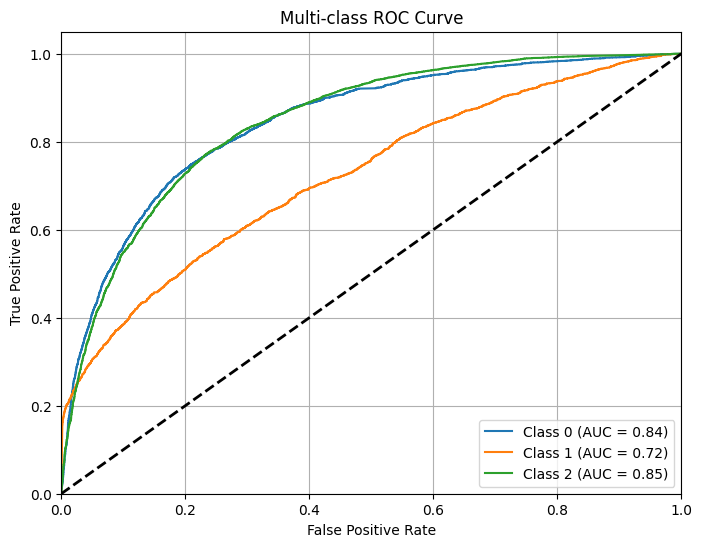

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

# Load GloVe embeddings from the uploaded file
glove_vectors = {}
with open('/content/glove.6B.100d.txt', 'r', encoding='utf-8') as f:  # Use 100-dimensional GloVe embeddings for faster training
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        glove_vectors[word] = vector

print('GloVe embeddings loaded successfully.')

# Function to convert text to GloVe embeddings
def text_to_glove(text):
    words = text.split()
    word_vectors = [glove_vectors[word] for word in words if word in glove_vectors]
    if not word_vectors:
        return np.zeros(100)  # Reduced to 100 dimensions
    return np.mean(word_vectors, axis=0)

df['Tweet'] = df['Tweet'].astype(str)

# Convert text to GloVe embeddings
X_glove = np.array([text_to_glove(tweet) for tweet in df['lematized_text']])
y = df['Sentiment']

print('Text data converted to GloVe embeddings successfully.')

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_glove, y, test_size=0.2, random_state=42)

# Binarize the output labels for multi-class ROC
encoder = OneHotEncoder()
y_train_binarized = encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test_binarized = encoder.transform(y_test.values.reshape(-1, 1)).toarray()

# Create and train the LinearSVC model for faster training
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Step 1: Get the decision function scores for ROC curve
y_score = svm_model.decision_function(X_test)

# Step 2: Compute ROC curve and AUC for each class
fpr = dict()  # False Positive Rate
tpr = dict()  # True Positive Rate
roc_auc = dict()  # ROC AUC for each class

n_classes = y_train_binarized.shape[1]  # Number of classes

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_score[:, i])

# Step 3: Plot the ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Step 4: Plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Dashed diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


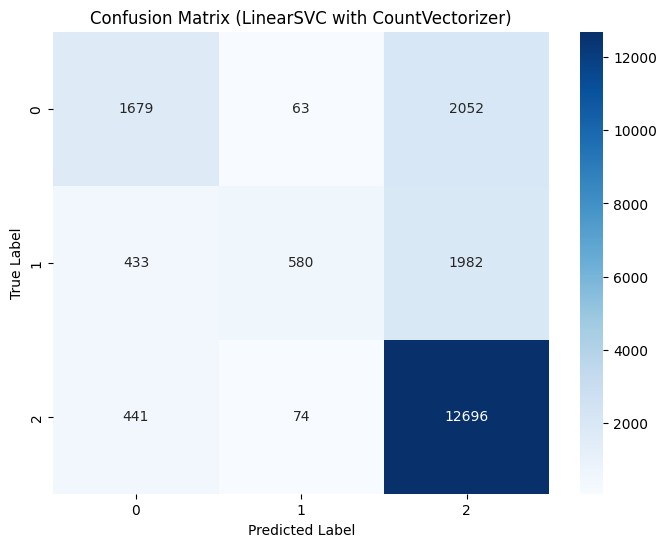

In [91]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (LinearSVC with CountVectorizer)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

| Task                                   | Model                             | Status                          | Results                               | Individual Responsible |
|----------------------------------------|-----------------------------------|---------------------------------|---------------------------------------|------------------------|
| SVM model with Unigram Count Vectors   | Model 1                           | Model trained and evaluated     | Accuracy = 0.7989                          | Rithwik Prem                 |
|                                        |                                   |                                 | F1 Score (Positive) = 0.89               |                        |
|                                        |                                   |                                 | AUC = Pos:0.14,Neg: 0.13, Neut: 76                                |                        |
| Feature Engineering                    | Added new features                | Length and Emoji features added |                                       |      Pulkit Batra             |
| Cross Validation                       | Performed                         | Cross-validation Accuracy = 0.80   |                                       |                        |
| SVM model with Unigram+Bigram TF-IDF   | Model 2                           | Model trained and evaluated     | Accuracy = 0.7867                          |  Shekhar Tiruwa              |
|                                        |                                   |                                 | F1 Score (Positive) = 0.88               |                        |
|                                        |                                   |                                 | AUC = Pos:0.17 Neg:65 Neut:22                               |                        |
| Feature Engineering                    | Added new features                | Hashtags and Punctuation handling |                                     |                              |
| Cross Validation                       | Performed                         | Cross-validation Accuracy = 0.78   |                                       |                        |
| Naive Bayes with One-Hot Vectors       | Model 3                           | Model trained and evaluated     | Accuracy = 0.7105                          |  Bhupinder Singh              |
|                                        |                                   |                                 | F1 Score (Positive) = 0.83               |                        |
|                                        |                                   |                                 | AUC = Pos:0.18 Neg:0.65 Neut: 0.29                               |                        |
| Feature Engineering                    | Added new features                | Slang and Abbreviation handling |                                       |  Vishal Girase              |
| Cross Validation                       | Performed                         | Cross-validation Accuracy = 0.70   |                                       |                        |
| SVM with Word2Vec                      | Model 4                           | Model trained and evaluated     | Accuracy = 0.69                          | Sweatha Palani             |
|                                        |                                   |                                 | F1 Score (Positive) = 0.82               |                        |
|                                        |                                   |                                 | AUC = Pos:0.78 Neg:0.72 Neut: 0.68                               |                        |
| Feature Engineering                    | Added new features                | Word Embeddings (Word2Vec)      |                                       | Dharmil Patel               |
| Cross Validation                       | Performed                         | Cross-validation Accuracy    |                                       |                        |
| SVM with GloVe/FastText/ELMo           | Model 5                           | Model trained and evaluated     | Accuracy = 0.74                          |  Kevinsinh Raj         |
|                                        |                                   |                                 | F1 Score (Positive) = 0.85               |                        |
|                                        |                                   |                                 | AUC = Pos:0.84 Neg:0.72 Neut:0.85                               |                        |
| Feature Engineering                    | Added new features                | Word Embeddings (GloVe/FastText)|                                       | Pulkit Batra              |
| Cross Validation                       | Performed                         | Cross-validation Accuracy =    |                                       |                        |